In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import random
from scipy.optimize import curve_fit
from scipy.fft import rfft, rfftfreq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.fft import fft,fftfreq

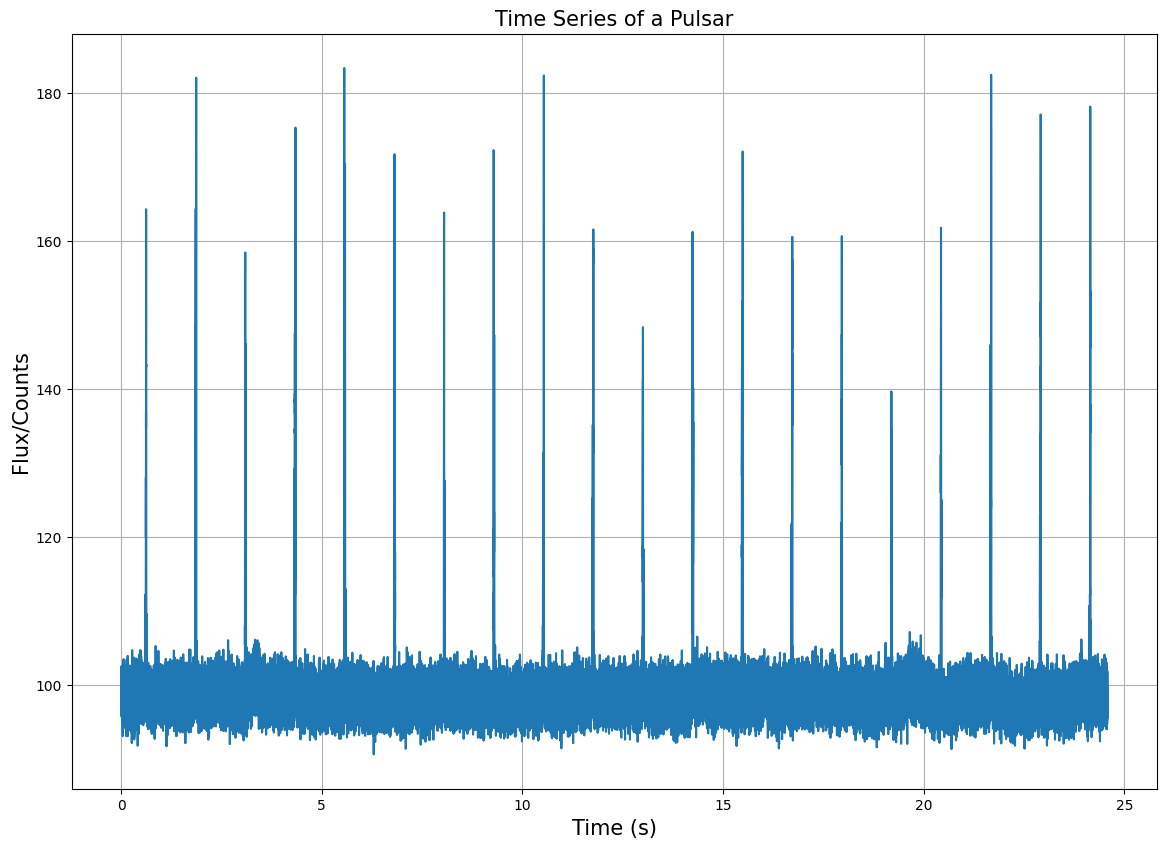

<Figure size 432x288 with 0 Axes>

In [2]:
prob1 = np.loadtxt("pulsar_data.txt")
#print(prob1)
flux = prob1[:100000,1]
time = prob1[:100000,0]

N = len(prob1[:,0])
sample_rate = N/prob1[-1,0]

#print(sample_rate)

plt.figure(figsize=(14,10),dpi=100)
plt.plot(time,flux)
plt.ylabel("Flux/Counts",size=15)
plt.xlabel("Time (s)",size=15)
plt.title("Time Series of a Pulsar",size=15)
plt.grid()
plt.show()

plt.savefig("ts_pulsar.eps",format='eps')

[4.06905111e-02 8.13810221e-02 1.22071533e-01 ... 2.03444417e+03
 2.03448486e+03 2.03452555e+03]
[ 1125.57668539 13588.38954934  3852.5617935  ...   278.32863736
   282.99923602   377.7234218 ]


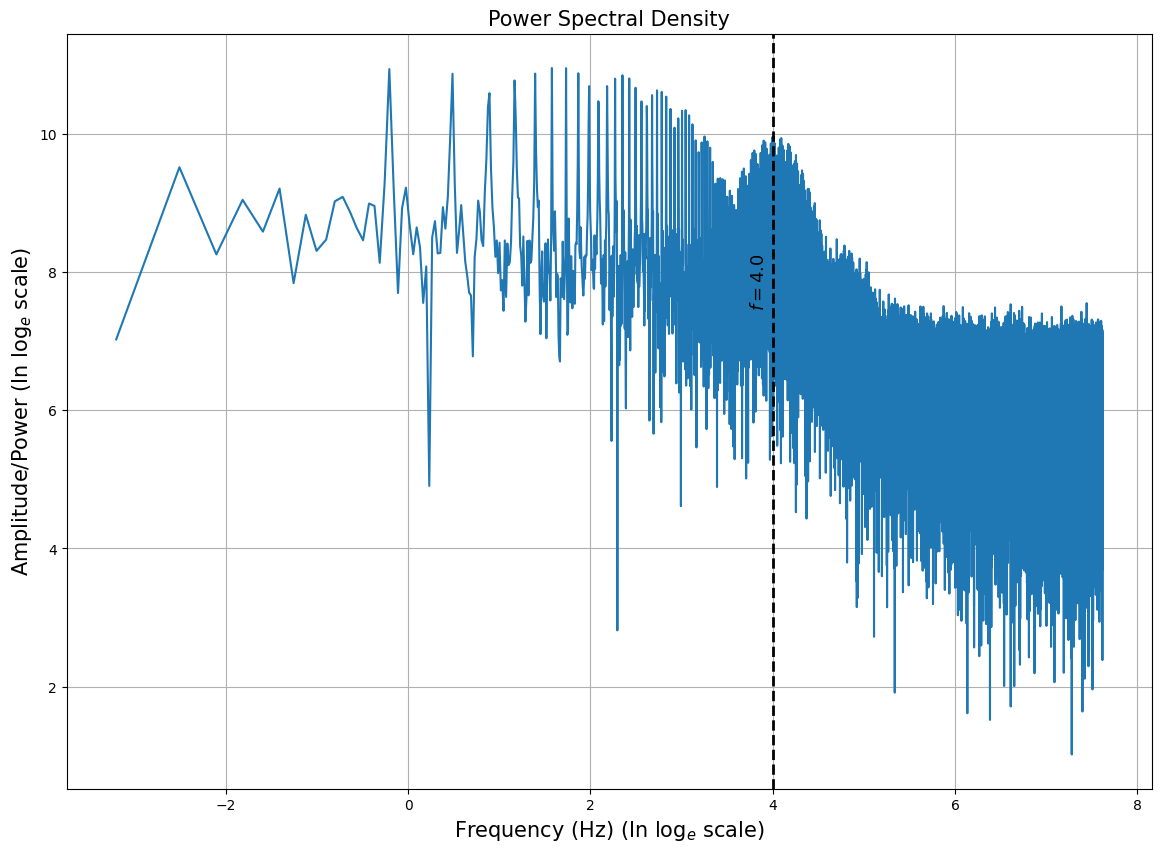

<Figure size 432x288 with 0 Axes>

In [3]:
amp_data = np.abs(rfft(flux))
freq_data = rfftfreq(N, 1/sample_rate)
#print(freq_data)
#print(amp_data)
freq_data = np.delete(freq_data, [0])
amp_data = np.delete(amp_data, [0])
print(freq_data)
print(amp_data)

plt.figure(figsize=(14,10),dpi=100)
plt.plot(np.log(freq_data),np.log(np.abs(amp_data)))
plt.axvline(x=4.0,linestyle='--',linewidth=2,color='k')
plt.text(3.75,7.5,'$f = 4.0$',rotation=90,size=13)
plt.xlabel("Frequency (Hz) (In log$_e$ scale)",size=15)
plt.ylabel("Amplitude/Power (In log$_e$ scale)",size=15)


plt.title("Power Spectral Density",size=15)
plt.grid()
plt.show()

plt.savefig("psd_pulsar.eps",format='eps')
